## Clasificación MNIST con KERAS usando CNN/ConvNets 

Primero importamos las librerias necesarias...

In [24]:
#from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as k
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Este comando se usa para cambiar el estilo tradicional de matplotlib...

In [25]:
matplotlib.style.use('seaborn') 

Se cargan los datos en sus respectivos conjuntos de entrenamiento y pruebas:

In [26]:
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Se muestran algunos de los datos, con el fin de visualizarlos en caso de no conocer MNIST o bien, para validar que esten bien:

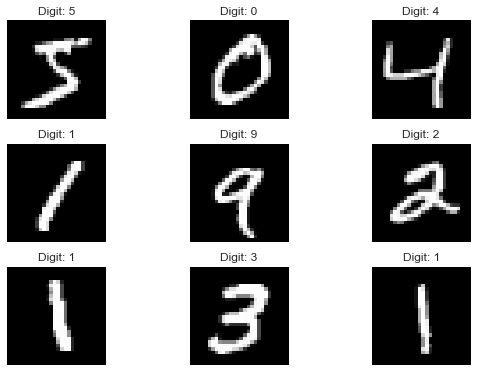

In [27]:
#visualising first 9 data from training dataset

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

Se validan los tamaños de los sets de entrenamiento y de prueba:

In [28]:
# let's print the actual data shape before we reshape and normalize

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [29]:
X_train[9] # validacion de valores de pixeles, notese como los valores están entre 1 y 255.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  

In [30]:
X_train[9].shape

(28, 28)

Se lleva a cabo un pre-procesado que incluye re-shaping y ajuste de valores de la imagen (de 1-255 a 0-1). 

In [7]:
#input image size 28*28
img_rows , img_cols = 28, 28

#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).

if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28, 1)
y_train shape (60000,)
X_test shape (10000, 28, 28, 1)
y_test shape (10000,)


In [9]:
X_train[9] # validacion de valores de pixeles, notese como los valores están entre 0 y 1.

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

A continuación los datos de salida se convierten a catergorías:

In [10]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [11]:
#set number of categories
num_category = 10

In [12]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Se procede a contruir el modelo de CNN:

In [13]:
##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

Se entrena el sistema:

In [14]:
import time

batch_size = 128
num_epoch = 10

#model training

start = time.time()

model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

end = time.time()
m = (end - start)/60
m = round(m, 2)
s = (end - start)
s = round(s, 2)

print(f"Training time: {m} min / {s} sec")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 90s 1ms/step - loss: 0.2629 - acc: 0.9202 - val_loss: 0.0557 - val_acc: 0.9808
Epoch 2/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0875 - acc: 0.9742 - val_loss: 0.0450 - val_acc: 0.9845
Epoch 3/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0663 - acc: 0.9801 - val_loss: 0.0363 - val_acc: 0.9873
Epoch 4/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0550 - acc: 0.9834 - val_loss: 0.0302 - val_acc: 0.9895
Epoch 5/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0469 - acc: 0.9853 - val_loss: 0.0280 - val_acc: 0.9909
Epoch 6/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0416 - acc: 0.9871 - val_loss: 0.0273 - val_acc: 0.9905
Epoch 7/10
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0371 - acc: 0.9887 - val_loss: 0.0291 - val_

Se evalua el sistema:

In [15]:
#how well did it do? 

start = time.time()

score = model.evaluate(X_test, y_test, verbose=0)

end = time.time()
m = (end - start)/60
m = round(m, 2)
s = (end - start)
s = round(s, 2)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100, '%')

print(f"Test time: {m} min / {s} sec")

Test loss: 0.028642475295794428
Test accuracy: 99.11999999999999 %
Test time: 0.06 min / 3.31 sec


Se despliegan las curvas de **"model accurracy"** y **"model loss"**.

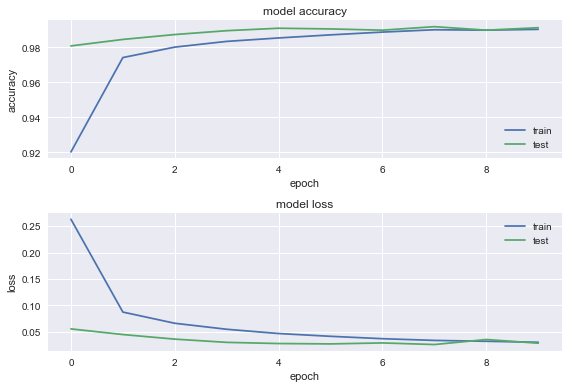

In [16]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [17]:
print(plt.style.available) # opciones para visualizar curvas en maplotlib con estilos diferentes

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [18]:
a = np.zeros((10, 2))
a

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [19]:
b= a.reshape(10,2,1)
b

array([[[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]]])

In [20]:
print(a.shape)
print(b.shape)

(10, 2)
(10, 2, 1)
